# Import Libraries

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report

import time

In [2]:
# Import Dataset

df = pd.read_csv('Group_12_data_cleaned.csv') 
df.head()

,Unnamed: 0,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,monk
0,0,0.266074,-0.165620,0.320980,0.483299,0.000000,0.273364,0.371178,0.929823,0.251173,A
1,1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,A
2,2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,A
3,3,0.031541,0.297600,-3.210528,-0.583590,0.000000,-0.307984,0.710932,1.051693,0.594169,A
4,4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,F


In [3]:
# Check descriptive statistics of dataset

df.describe()

,Unnamed: 0,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number
count,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000
mean,5216.250587,-0.038164,-0.057172,-0.009766,0.000115,0.204178,-0.004961,0.040236,-0.000634,0.002551
std,3011.965191,0.793469,0.480454,0.965513,0.999997,0.319982,0.968284,0.782209,0.995826,0.993220
min,0.000000,-3.498799,-2.426761,-3.210528,-5.440122,-1.078955,-4.128270,-4.876130,-4.247781,-4.238959
25%,2608.000000,-0.128929,-0.259834,0.064919,-0.527256,0.082961,-0.598658,-0.044076,-0.543914,-0.372457
50%,5216.000000,0.043885,-0.055704,0.214288,0.089437,0.261718,-0.058835,0.220177,0.108221,0.064084
75%,7824.500000,0.204355,0.203385,0.352988,0.643738,0.261718,0.564038,0.446679,0.648376,0.500624
max,10436.000000,4.969080,3.846334,5.491990,3.987152,1.066121,3.969075,3.995218,4.580832,3.244594


In [4]:
# Check data format

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20867 entries, 0 to 20866
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              20867 non-null  int64  
 1   intercolumnar distance  20867 non-null  float64
 2   upper margin            20867 non-null  float64
 3   lower margin            20867 non-null  float64
 4   exploitation            20867 non-null  float64
 5   row number              20867 non-null  float64
 6   modular ratio           20867 non-null  float64
 7   interlinear spacing     20867 non-null  float64
 8   weight                  20867 non-null  float64
 9   peak number             20867 non-null  float64
 10  monk                    20867 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.8+ MB


In [5]:
# Drop the first index column

df = df.drop(columns=['Unnamed: 0'])
df.head()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,monk
0,0.266074,-0.165620,0.320980,0.483299,0.000000,0.273364,0.371178,0.929823,0.251173,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,A
3,0.031541,0.297600,-3.210528,-0.583590,0.000000,-0.307984,0.710932,1.051693,0.594169,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,F


In [6]:
df['monk'].value_counts()

A    8572
F    3923
E    2190
I    1663
X    1044
H    1039
G     893
D     705
Y     533
C     206
W      89
B      10
Name: monk, dtype: int64

In [7]:
# Categorize monk variable to numerical categorical values

df['monk'].replace(['A', 'F','E','I','X','H','G','D','Y','C','W','B'],
                        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], inplace=True)
df.head()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,monk
0,0.266074,-0.165620,0.320980,0.483299,0.000000,0.273364,0.371178,0.929823,0.251173,0
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0
3,0.031541,0.297600,-3.210528,-0.583590,0.000000,-0.307984,0.710932,1.051693,0.594169,0
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,1


In [8]:
# Split data to features and labels

X = df.drop(columns=['monk'])
y = df['monk']

In [9]:
# Split data to training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify = y)

In [10]:
# Training a naive SVM classifier using SVC class

svm = SVC()
start_time = time.time()
svm.fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 108.4990394115448 seconds ---


In [11]:
y_pred = svm.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.92      0.80      2572
           1       0.70      0.47      0.56      1177
           2       0.70      0.77      0.73       657
           3       0.99      0.96      0.98       499
           4       0.88      0.83      0.85       313
           5       0.77      0.49      0.60       312
           6       0.75      0.48      0.58       268
           7       0.80      0.31      0.45       211
           8       0.84      0.77      0.80       160
           9       1.00      0.03      0.06        62
          10       0.91      0.37      0.53        27
          11       0.00      0.00      0.00         3

    accuracy                           0.74      6261
   macro avg       0.75      0.53      0.58      6261
weighted avg       0.75      0.74      0.72      6261



C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


With no hyperparameter tuning, the model performs at an accuracy of 74%. 

## Randomized Grid Search

In [12]:
# Perform grid search to get optimal hyperparameters for Support Vector Machine

import warnings
warnings.filterwarnings('ignore')


# defining parameter ranges
params = {'C': [ 0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = RandomizedSearchCV(SVC(), param_distributions=params, n_iter=25 , n_jobs = -1, scoring = 'accuracy')

In [13]:
start_time = time.time()
grid.fit(X_train,y_train)
print("---Model Run time: %s seconds ---" % (time.time() - start_time))

---Model Run time: 3158.468212366104 seconds ---


In [14]:
print("Random search best parameters :" , grid.best_params_)
print("Random search highest accuracy :" , grid.best_score_)

Random search best parameters : {'kernel': 'rbf', 'gamma': 0.1, 'C': 1000}
Random search highest accuracy : 0.8282217021774162


## Support Vector Machine Model - Optimal Hyperparameters

In [15]:
svm = SVC(C = 1000, gamma = 0.1)
start_time = time.time()
svm.fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 205.00330591201782 seconds ---


In [16]:
y_pred = svm.predict(X_test)
svm_clr = classification_report(y_test, y_pred)
print(svm_clr)

svm_clr_2 = classification_report(y_test, y_pred, output_dict = True)
%store svm_clr_2

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      2572
           1       0.80      0.70      0.74      1177
           2       0.88      0.83      0.86       657
           3       0.99      0.97      0.98       499
           4       0.93      0.91      0.92       313
           5       0.81      0.73      0.77       312
           6       0.81      0.74      0.77       268
           7       0.88      0.79      0.83       211
           8       0.95      0.86      0.90       160
           9       0.95      0.94      0.94        62
          10       0.93      0.96      0.95        27
          11       1.00      1.00      1.00         3

    accuracy                           0.84      6261
   macro avg       0.90      0.86      0.88      6261
weighted avg       0.84      0.84      0.84      6261

Stored 'svm_clr_2' (dict)


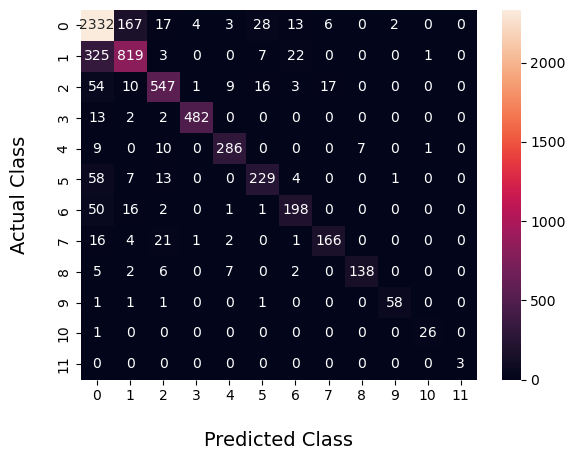

In [17]:
# Plot confusion matrix

cm = metrics.confusion_matrix(y_test, y_pred)

ax = sns.heatmap(cm, annot=True, fmt='d', )

# set x and y label
ax.set_xlabel("Predicted Class", fontsize=14, labelpad=20)
ax.set_ylabel("Actual Class", fontsize=14, labelpad=20)
plt.savefig('svm_cm.png')